# Data Wrangling - Project Code 
## The relation between government policies regarding tobacco and its use.

Group 44 - Project group members:

1.       Zahra Moradi, zmi450
2.       Alexander van der Linden, aln980
3.       Elisa Bermejo Casla, eba215
4.       Zoë Blei, zbi310

In [ ]:
#!pip install matplotlib==3.4.2

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from functools import reduce
pd.options.display.max_rows = 20
np.set_printoptions(precision = 4, suppress = True)

In [2]:
from google.colab import drive

#mount
# this mounts whole google drive content :(
drive.mount('/content/drive')

#unmount
#!rm -rf /content/drive
#drive.flush_and_unmount()

Mounted at /content/drive


## The tobacco dataset

Here we will read the .csv with data about tobacco use, select the 5 countries with higher increase in tobacco use from 2000 to 2020, higher decrease in tobacco use during the same years, as well as the five countries with the higher tobacco use in 2020 and the lower use.

In [3]:
#use_path = "/content/datasets/API_SH.PRV.SMOK_DS2_en_csv_v2_4772824.csv"
use_path = '/content/drive/MyDrive/Colab_Notebooks/API_SH.PRV.SMOK_DS2_en_csv_v2_4772824.csv'

tabacco_use = pd.read_csv(use_path, skiprows=[0,1,2,3])

#select initial columns of interest
cols = list(tabacco_use.columns)
tabacco_use = tabacco_use[cols[0:2] +cols[-23:-2]]

#drop years without data
tabacco_use = tabacco_use.dropna(axis=1, how='all')

#drop countries without data
tabacco_use = tabacco_use.dropna(axis=0, thresh=7, how='any')

#calculate difference between last and first observation (from data used)
tabacco_use['diff'] = tabacco_use['2020'] - tabacco_use['2000'] 

#display(tabacco_use)


# 5 countries with biggest increase in tabacco use
biggest_increase = tabacco_use.sort_values(['diff'], ascending=0)[0:5]
#display(biggest_increase)

# 5 countries with biggest decrease in tabacco use
biggest_decrease = tabacco_use.sort_values(['diff'], ascending=1)[0:5]
#display(biggest_decrease)

# 5 countries with highest tabacco use in 2020
highest_use = tabacco_use.sort_values(['2020'], ascending=0)[0:5]
#display(highest_use)

# 5 countries with lowest tabacco use in 2020
lowest_use = tabacco_use.sort_values(['2020'], ascending=1)[0:5]
#display(lowest_use)


# put together all 4 previous datasets

final = pd.concat(objs= [biggest_increase,biggest_decrease, highest_use, lowest_use], axis=0)
final = final.drop_duplicates() # 124 Kiribati was duplicated
display(final)


,Country Name,Country Code,2000,2005,2010,2015,2018,2019,2020,diff
118,Jordan,JOR,30.7,31.7,32.6,33.7,34.6,34.6,34.8,4.1
150,Moldova,MDA,25.3,26.0,26.9,27.9,28.7,28.7,29.0,3.7
44,"Congo, Rep.",COG,11.9,12.2,12.8,13.5,14.3,14.3,14.5,2.6
99,Croatia,HRV,34.4,34.9,35.4,36.1,36.7,36.7,36.9,2.5
106,Indonesia,IDN,35.4,35.8,36.3,36.7,37.2,37.2,37.6,2.2
178,Nepal,NPL,64.5,53.5,43.6,36.0,31.5,31.5,30.4,-34.1
210,Sierra Leone,SLE,43.7,32.6,24.3,18.1,14.3,14.3,13.5,-30.2
124,Kiribati,KIR,68.5,60.4,52.7,46.4,41.7,41.7,40.6,-27.9
177,Norway,NOR,44.0,34.3,26.7,20.7,17.1,17.1,16.2,-27.8
109,India,IND,54.5,45.5,38.1,32.2,28.1,28.1,27.2,-27.3


Text(0.5, 0, 'Country')

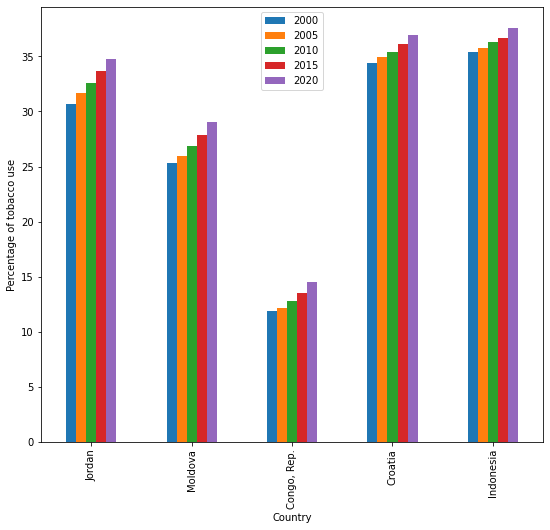

In [4]:
biggest_increase_df = biggest_increase[["Country Name", "2000", "2005", "2010", "2015", "2020"]]
biggest_increase_df.plot(x='Country Name', y=["2000", "2005", "2010", "2015", "2020"], kind="bar", figsize=(9, 8))	
plt.ylabel("Percentage of tobacco use")
plt.xlabel("Country")

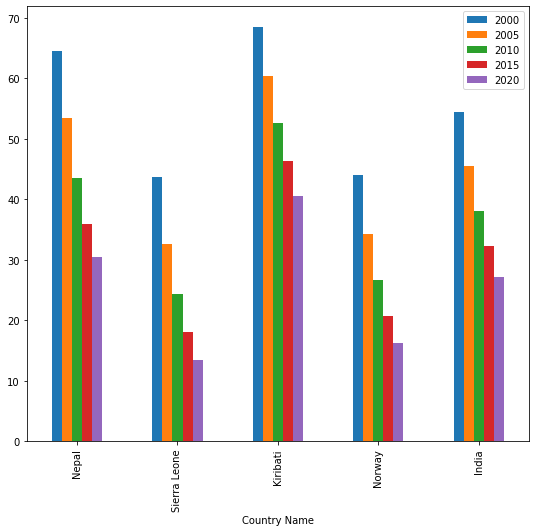

In [5]:
biggest_decrease_df = biggest_decrease[["Country Name", "2000", "2005", "2010", "2015", "2020"]]
biggest_decrease_df.plot(x='Country Name', y=["2000", "2005", "2010", "2015", "2020"], kind="bar", figsize=(9, 8))	

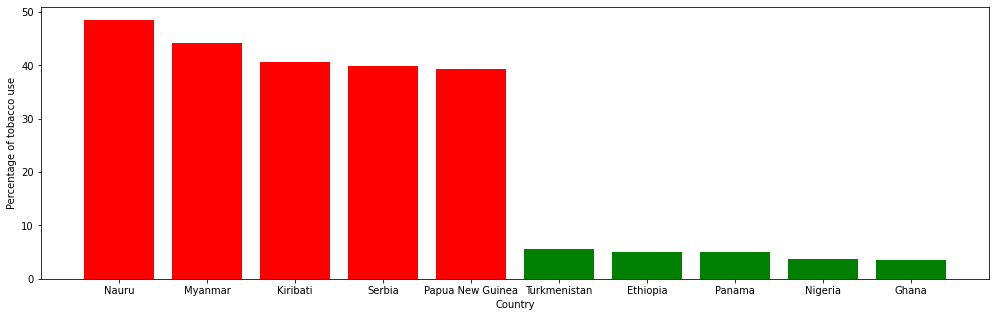

In [7]:
highest_use_df = highest_use[["Country Name", "2020"]]
lowest_use_df = lowest_use[["Country Name", "2020"]]
lowest_use_df = lowest_use_df.iloc[::-1]
merged = [highest_use_df, lowest_use_df]
merged_df = pd.concat(merged)
use_color = [{p<=20: 'green', p>20: 'red'}[True] for p in merged_df["2020"]]
plt.figure(figsize=(17,5))
plt.bar(merged_df['Country Name'], merged_df["2020"], color=use_color)
plt.ylabel("Percentage of tobacco use")
plt.xlabel("Country")
plt.show()

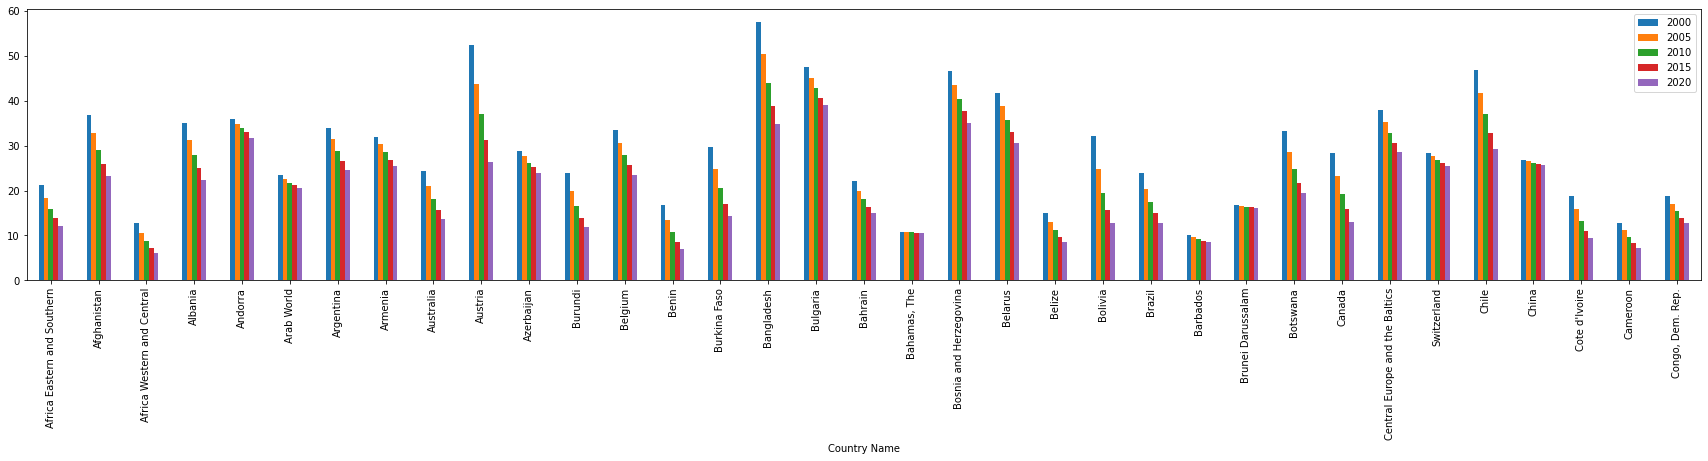

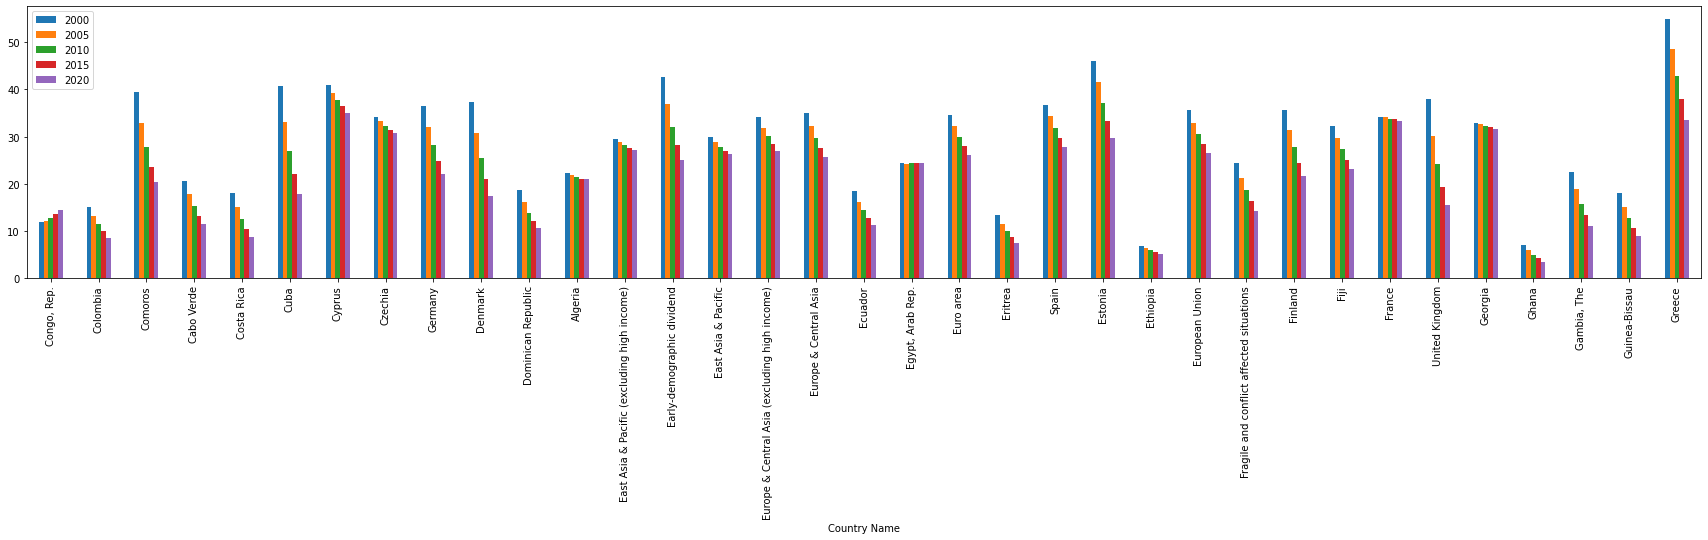

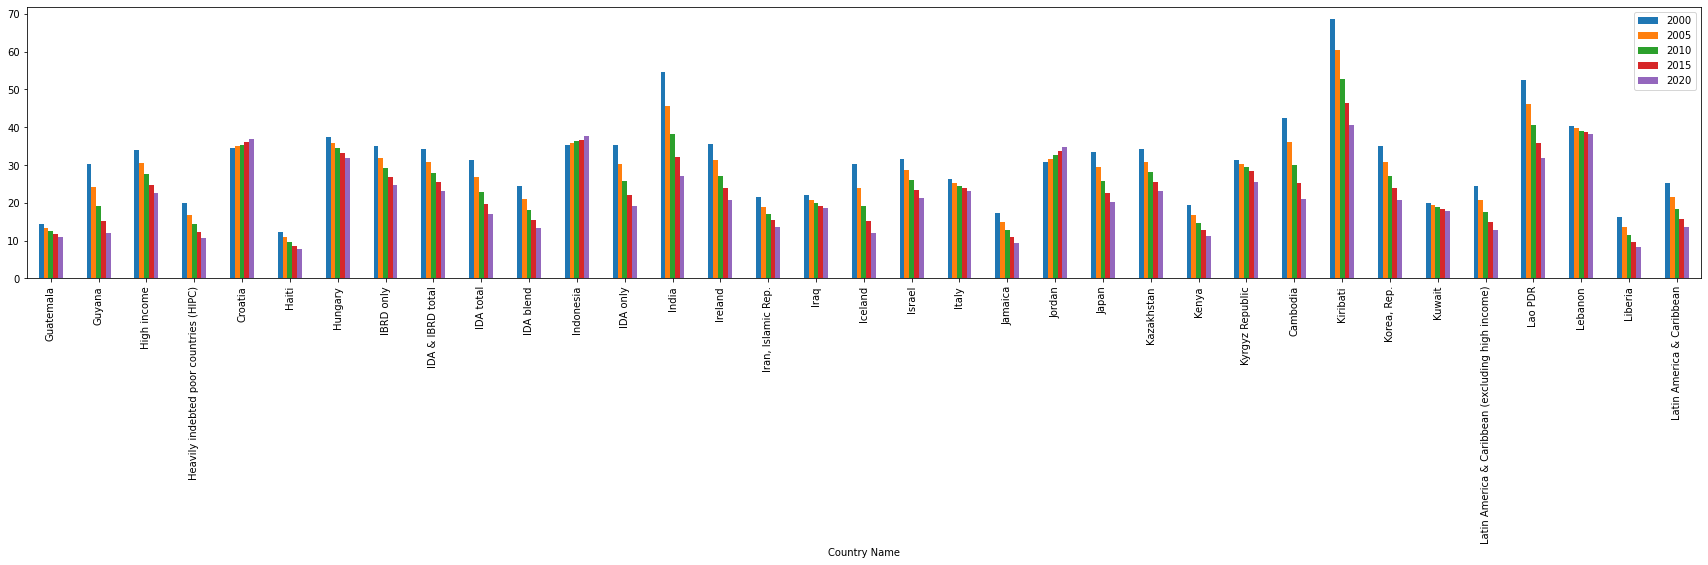

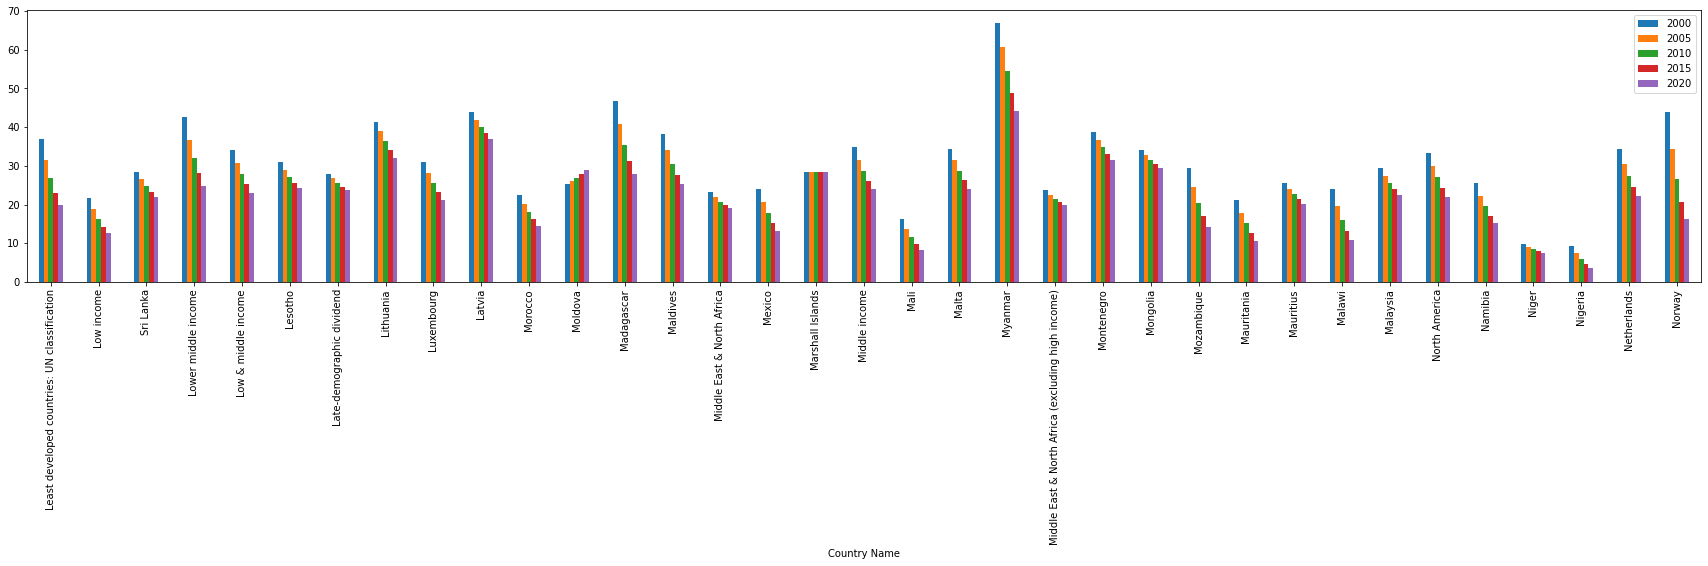

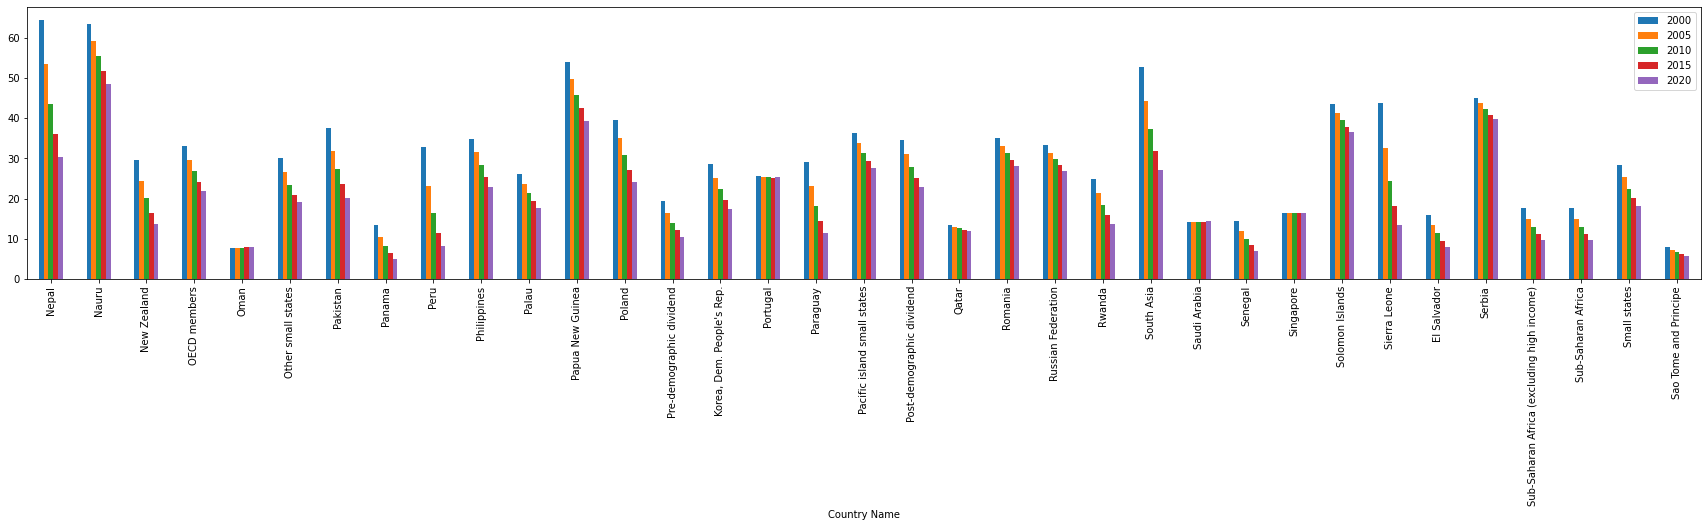

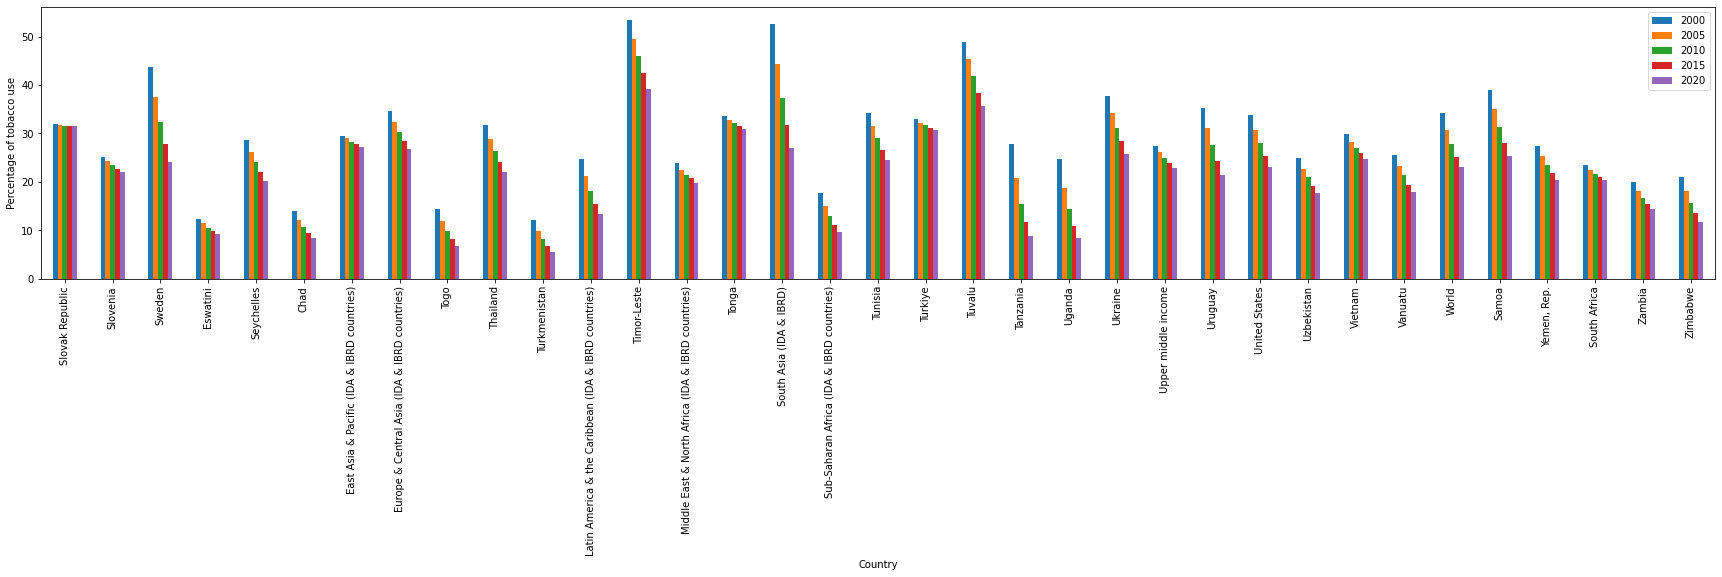

,index,Country Name,2000,2005,2010,2015,2018,2019,2020
0,1,Africa Eastern and Southern,21.206918,18.246597,15.853526,13.859451,12.479909,12.451456,12.125734
1,2,Afghanistan,36.900000,32.700000,29.100000,26.000000,23.800000,23.800000,23.300000
2,3,Africa Western and Central,12.780393,10.596512,8.775808,7.318057,6.347631,6.352941,6.120638
3,5,Albania,35.000000,31.300000,28.000000,25.100000,23.000000,23.000000,22.400000
4,6,Andorra,35.900000,34.800000,34.000000,33.000000,32.000000,32.000000,31.800000
...,...,...,...,...,...,...,...,...,...
205,260,Samoa,39.000000,35.000000,31.400000,28.100000,25.900000,25.900000,25.300000
206,262,"Yemen, Rep.",27.300000,25.300000,23.400000,21.800000,20.500000,20.500000,20.300000
207,263,South Africa,23.500000,22.500000,21.600000,21.000000,20.400000,20.400000,20.300000
208,264,Zambia,19.900000,18.100000,16.700000,15.500000,14.600000,14.600000,14.400000


In [8]:
new = tabacco_use[["Country Name", "2000", "2005", "2010", "2015", "2018", "2019", "2020"]].reset_index()
new[0:35].plot(x='Country Name', y=["2000", "2005", "2010", "2015", "2020"], kind="bar", figsize=(30, 5))
new[35:70].plot(x='Country Name', y=["2000", "2005", "2010", "2015", "2020"], kind="bar", figsize=(30, 5))
new[70:105].plot(x='Country Name', y=["2000", "2005", "2010", "2015", "2020"], kind="bar", figsize=(30, 5))
new[105:140].plot(x='Country Name', y=["2000", "2005", "2010", "2015", "2020"], kind="bar", figsize=(30, 5))
new[140:175].plot(x='Country Name', y=["2000", "2005", "2010", "2015", "2020"], kind="bar", figsize=(30, 5))
new[175:210].plot(x='Country Name', y=["2000", "2005", "2010", "2015", "2020"], kind="bar", figsize=(30, 5))
# new[0:35].plot(x='Country Name', y=["2018", "2019", "2020"], kind="bar", figsize=(30, 5))
# new[35:70].plot(x='Country Name', y=["2018", "2019", "2020"], kind="bar", figsize=(30, 5))
# new[70:105].plot(x='Country Name', y=["2018", "2019", "2020"], kind="bar", figsize=(30, 5))
# new[105:140].plot(x='Country Name', y=["2018", "2019", "2020"], kind="bar", figsize=(30, 5))
# new[140:175].plot(x='Country Name', y=["2018", "2019", "2020"], kind="bar", figsize=(30, 5))
# new[175:210].plot(x='Country Name', y=["2018", "2019", "2020"], kind="bar", figsize=(30, 5))
plt.ylabel("Percentage of tobacco use")
plt.xlabel("Country")
plt.show()
new

In [11]:
path2 = '/content/drive/MyDrive/Colab_Notebooks/packaging.csv'
path3 = '/content/drive/MyDrive/Colab_Notebooks/taxes.csv'
path4 = '/content/drive/MyDrive/Colab_Notebooks/smoking_ban_places.csv'
path5 = '/content/drive/MyDrive/Colab_Notebooks/advertising_ban.csv'

packaging = pd.read_csv(path2)
taxes = pd.read_csv(path3)
smoking_ban_places = pd.read_csv(path4)
advertising_ban = pd.read_csv(path5)

packaging = packaging[["SpatialDimValueCode", "Location", "Period", "Value"]]
taxes = taxes [taxes["Indicator"] == "Most sold brand of cigarettes - taxes as a % of price - total tax"]
taxes = taxes[["SpatialDimValueCode", "Location", "Period", "Value"]].reset_index(drop=True)
smoking_ban_places = smoking_ban_places[["SpatialDimValueCode", "Location", "Period", "Value"]]
advertising_ban = advertising_ban[["SpatialDimValueCode", "Location", "Period", "Value"]]

#originally value of 1 stood for not information --> change to NA and scale rest of the numbers
advertising_ban["Value"] = advertising_ban["Value"] - 2
advertising_ban.loc[advertising_ban['Value'] < 0, 'Value'] = np.nan 
advertising_ban['Value'] = advertising_ban['Value'].astype('Int64')

In [18]:
# MERGE PREVIOUS DATASETS

# rename value columns in all datasets
packaging = packaging.rename(columns={"Value": "packaging"})
taxes = taxes.rename(columns={"Value": "taxes"})
smoking_ban_places = smoking_ban_places.rename(columns={"Value": "smoking_ban_places"})
advertising_ban = advertising_ban.rename(columns={"Value": "advertising_ban"})

# merge datasets
data_frames = [packaging, taxes, smoking_ban_places, advertising_ban]
factors = reduce(lambda  left,right: pd.merge(left,right,on=['SpatialDimValueCode', 'Location', 'Period'],
                                            how='outer'), data_frames)
display(factors)

,SpatialDimValueCode,Location,Period,packaging,taxes,smoking_ban_places,advertising_ban
0,AND,Andorra,2020,No,0.78,5,0
1,AGO,Angola,2020,No,0.12,5,2
2,BIH,Bosnia and Herzegovina,2020,No,0.84,0,2
3,BWA,Botswana,2020,No,0.52,0,2
4,DMA,Dominica,2020,No,0.23,0,0
...,...,...,...,...,...,...,...
1555,VEN,Venezuela (Bolivarian Republic of),2007,Yes,NaN,2,0
1556,VNM,Viet Nam,2007,Yes,NaN,6,2
1557,YEM,Yemen,2007,Yes,NaN,0,2
1558,ZMB,Zambia,2007,Yes,NaN,3,0


In [19]:
# MERGE FINAL (TABACO USE) AND FACTORS

# melt final to fit structure of factors
final = final[["Country Name", "Country Code", "2000", "2005", "2010", "2015", "2020"]]
list_codes = final['Country Code'].tolist()

final = final.melt(id_vars=["Country Name", "Country Code"], var_name="Year", value_name="Tabacco Use")
display(final)

KeyError: ignored

In [20]:
#select countries from factors df that were also in final dataset
specific_factors = factors.loc[([x in list_codes for x in factors['SpatialDimValueCode']])]

In [21]:
#(Alexander:)This cell is added as a replacement for the next cell. The next cell does not properly merge on the Year/Period columns and creates an incorrectly combined df.
## Comment/Uncomment code below this line to run/hide this cell.

#Change column names to match column names of final df
specific_factors = specific_factors.rename(columns={"Period": "Year", "SpatialDimValueCode": "Country Code", 'Location': 'Country Name'})
#Change datatype of year column for final df to match specific_factors df
final['Year'] =  final['Year'].astype(int)
# Moldova and Congo have different naming conventions so changed those to match the final df form
specific_factors['Country Name'] = specific_factors['Country Name'].replace({'Republic of Moldova': 'Moldova', 'Congo': 'Congo, Rep.'})
# display(specific_factors)
# display(final)

merged = pd.merge(final, specific_factors, on=['Country Name', 'Country Code', 'Year'], how= 'outer')
# Sort based on country name and then by year. The NaN values result from different timelines for different datasets.
merged = merged.sort_values(['Country Name','Year'], ascending= [True,True]).reset_index()
pd.options.display.max_rows = 2000
display(merged)
pd.options.display.max_rows = 20

,index,Country Name,Country Code,Year,Tabacco Use,packaging,taxes,smoking_ban_places,advertising_ban
0,2,"Congo, Rep.",COG,2000,11.9,NaN,NaN,NaN,<NA>
1,21,"Congo, Rep.",COG,2005,12.2,NaN,NaN,NaN,<NA>
2,190,"Congo, Rep.",COG,2007,NaN,No,NaN,0.0,2
3,171,"Congo, Rep.",COG,2008,NaN,No,0.32,0.0,2
4,40,"Congo, Rep.",COG,2010,12.8,No,0.32,0.0,2
5,155,"Congo, Rep.",COG,2012,NaN,Yes,0.32,8.0,2
6,134,"Congo, Rep.",COG,2014,NaN,Yes,0.38,8.0,2
7,59,"Congo, Rep.",COG,2015,13.5,NaN,NaN,NaN,<NA>
8,115,"Congo, Rep.",COG,2016,NaN,Yes,0.37,8.0,2
9,96,"Congo, Rep.",COG,2018,NaN,Yes,0.37,8.0,3


In [ ]:
# display(specific_factors)
# display(final)


# merged = pd.merge(final, specific_factors, left_on=['Country Code', right_on='SpatialDimValueCode', how= 'outer')
# merged = merged.drop(columns= ['Location', 'SpatialDimValueCode', 'Period'])

# pd.options.display.max_rows = 2000
# display(merged)
# pd.options.display.max_rows = 20

Country Name,Year,"Congo, Rep.",Croatia,Ethiopia,Ghana,India,Indonesia,Jordan,Kiribati,Moldova,Myanmar,Nauru,Nepal,Nigeria,Norway,Panama,Papua New Guinea,Serbia,Sierra Leone,Turkmenistan
0,2008,0.32,0.61,0.25,0.27,0.46,0.53,0.77,0.50,0.22,0.25,0.41,0.24,0.21,0.73,0.37,0.42,0.62,0.13,0.38
1,2010,0.32,0.72,0.39,0.22,0.45,0.54,0.80,0.63,0.30,0.25,0.42,0.29,0.21,0.72,0.59,NaN,0.75,0.13,0.58
2,2012,0.32,0.71,0.34,0.23,0.42,0.51,0.77,0.52,0.44,0.50,NaN,0.30,0.21,0.73,0.57,0.37,0.81,0.13,0.30
3,2014,0.38,0.75,0.19,0.28,0.41,0.53,0.83,0.49,0.51,0.50,NaN,0.28,0.21,0.69,0.57,0.36,0.78,0.13,0.26
4,2016,0.37,0.77,0.19,0.28,0.53,0.57,0.83,0.42,0.59,0.35,0.51,0.26,0.21,0.66,0.57,0.37,0.78,0.13,0.27
5,2018,0.37,0.79,0.19,0.31,0.54,0.53,0.81,0.42,0.58,0.33,0.48,0.30,0.30,0.64,0.57,0.54,0.77,0.18,0.32
6,2020,0.27,0.84,0.51,0.32,0.58,0.62,0.78,0.41,0.62,0.50,0.42,0.27,0.37,0.62,0.57,0.53,0.77,0.23,0.42


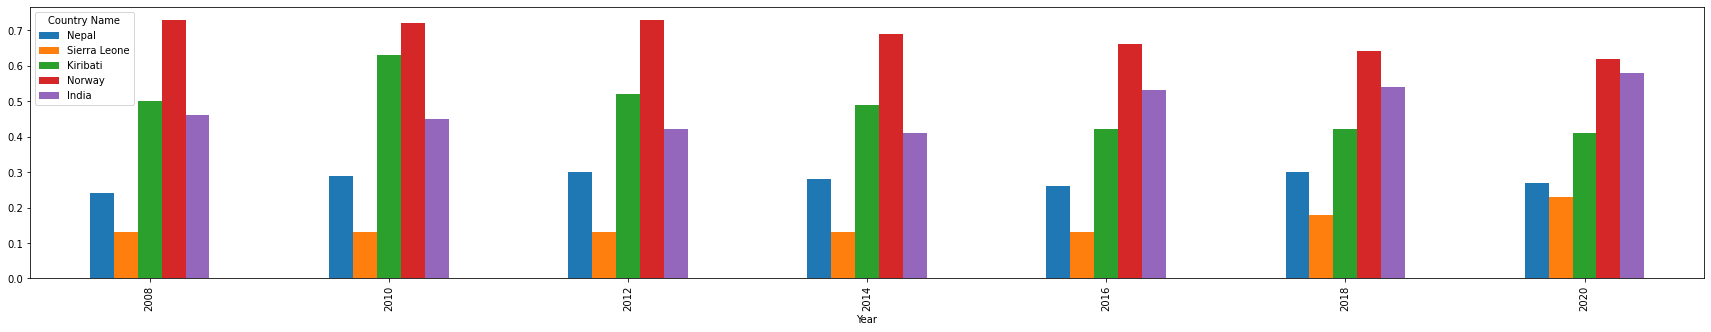

In [22]:
# zoë: creating df for the countries with highest decrease over the years, and how that correlates with tax
tax_high_dec = merged[['Country Name', 'Year', 'taxes']].reset_index()
tax_high_dec = tax_high_dec.pivot_table(values='taxes', index= 'Year', columns='Country Name', aggfunc='first').reset_index()
tax_high_dec = tax_high_dec.astype(float)
tax_high_dec["Year"] = tax_high_dec["Year"].astype(int)

# this is not working yet, but im not sure why...
tax_high_dec.plot(x='Year', y=["Nepal", "Sierra Leone", "Kiribati", "Norway", "India"], kind="bar", figsize=(30, 5))
#sns.barplot(x = ["Nepal", "Sierra Leone", "Kiribati", "Norway", "India"], y = 'taxes', data = pack_high_dec)	
display(tax_high_dec)
pd.options.display.max_rows = 20


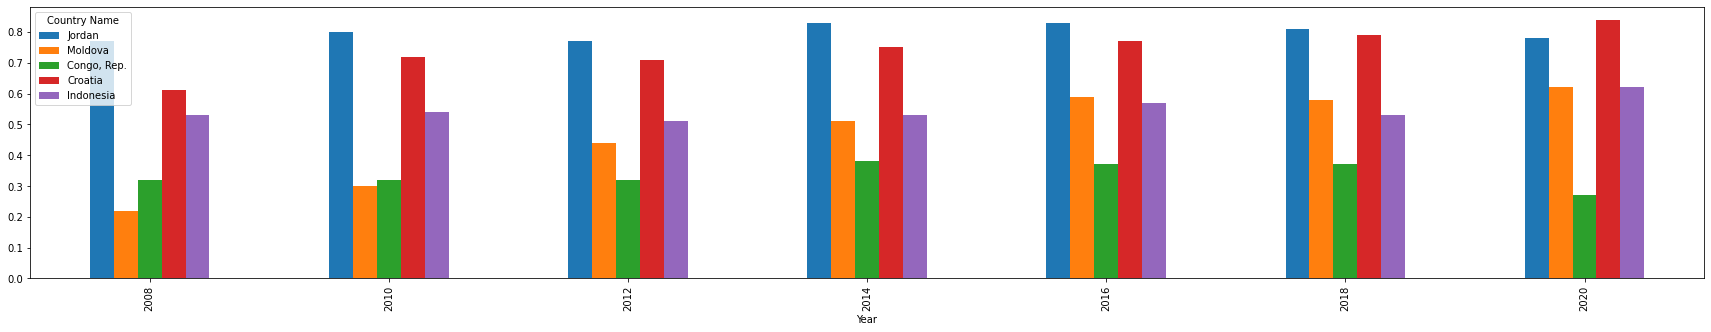

In [ ]:
# zoë: creating df for the countries with highest increase over the years, and how that correlates with tax

tax_high_inc = merged[['Country Name', 'Year', 'taxes']].reset_index()
tax_high_inc = tax_high_inc.pivot_table(values='taxes', index= 'Year', columns='Country Name', aggfunc='first').reset_index()
tax_high_inc = tax_high_inc.astype(float)
tax_high_inc["Year"] = tax_high_inc["Year"].astype(int)

# this is not working yet, but im not sure why...
tax_high_inc.plot(x='Year', y=["Jordan", "Moldova", "Congo, Rep.", "Croatia", "Indonesia"], kind="bar", figsize=(30, 5))
#sns.barplot(x = ["Nepal", "Sierra Leone", "Kiribati", "Norway", "India"], y = 'taxes', data = pack_high_dec)	

pd.options.display.max_rows = 20

In [ ]:
# zoe: create circle diagram for the countries with highest decrease and their packaging statistics 

pack_high_dec = merged[['Country Name', 'Year', 'packaging']].reset_index()
pack_high_dec = pack_high_dec.pivot_table(values='packaging', index= 'Year', columns='Country Name', aggfunc='first')

# circle diagram presents stats per year for all countries whether the value for packaging was yes/no

#colors = sns.color_palette('pastel')[0:5]
#plt.pie(pack_high_dec, labels = pack_high_dec["2007"], colors = colors, autopct='%.0f%%')




(0.0, 1.0)

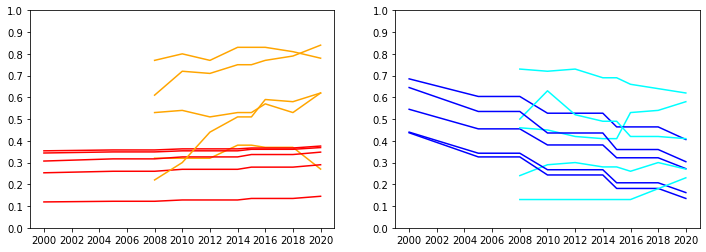

In [ ]:
list_of_countries = merged['Country Name'].unique()

fig = plt.figure()
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)
fig.set_figwidth(12)
fig.set_figheight(4)
years = range(2000,2021,2)
tens = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]

for country in list_of_countries:
  if country in biggest_increase['Country Name'].values:
    country_df = pd.DataFrame(merged.loc[merged['Country Name'] == country])
    country_df['Tabacco Use'].ffill(inplace=True)
    country_df['taxes'].ffill(inplace=True)
    ax1.plot(country_df['Year'], country_df['Tabacco Use']/100, color='red')
    ax1.plot(country_df['Year'], country_df['taxes'], color='orange')
  elif country in biggest_decrease['Country Name'].values:
    country_df = pd.DataFrame(merged.loc[merged['Country Name'] == country])
    country_df['Tabacco Use'].ffill(inplace=True)
    country_df['taxes'].ffill(inplace=True)
    ax2.plot(country_df['Year'], country_df['Tabacco Use']/100, color='blue')
    ax2.plot(country_df['Year'], country_df['taxes'], color='aqua')

ax1.set_xlim([1999, 2021])
ax1.set_xticks(years)
ax1.set_yticks(tens)
ax1.set_ylim([0, 1])
ax2.set_xlim([1999, 2021])
ax2.set_xticks(years)
ax2.set_yticks(tens)
ax2.set_ylim([0, 1])

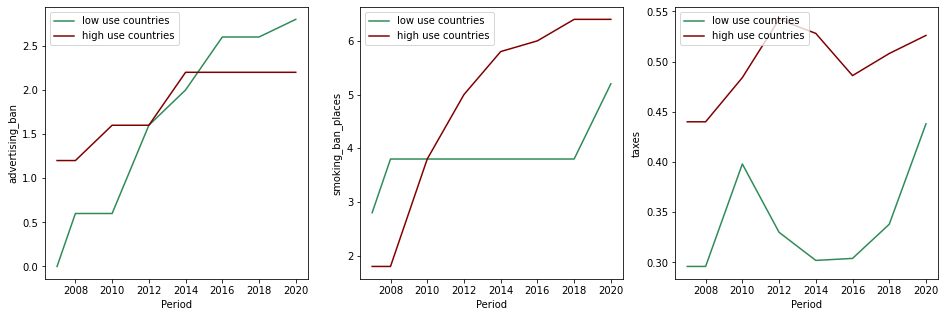

In [ ]:
#(Zahra)
# Creating a dataframe of the goverment policy attributes for only the countries with the highest tobacco use
highest_use_all = pd.merge(highest_use_df, factors, left_on='Country Name', right_on='Location', how= 'inner')
highest_use_all = highest_use_all.drop(['Country Name', '2020'], axis=1).fillna(method='ffill')
bool_values = {'Yes': True, 'No': False}
highest_use_all = highest_use_all.replace(bool_values)
highest_use_all["taxes"] = highest_use_all["taxes"].astype(float)
# Creating a dataframe of the goverment policy attributes for only the countries with the lowest in tobacco use
lowest_use_all = pd.merge(lowest_use_df, factors, left_on='Country Name', right_on='Location', how= 'inner')
lowest_use_all = lowest_use_all.drop(['Country Name', '2020'], axis=1).fillna(method='ffill')
bool_values = {'Yes': True, 'No': False}
lowest_use_all = lowest_use_all.replace(bool_values)
lowest_use_all["taxes"] = lowest_use_all["taxes"].astype(float)
# Grouping by year to see how the numeric values change over time
average_behaviour_lowest = lowest_use_all.drop('packaging', axis=1).groupby("Period").agg("mean")
average_behaviour_highest = highest_use_all.drop('packaging', axis=1).groupby("Period").agg("mean")
# Ploting the results
fig, axes = plt.subplots(1,3,figsize=(16,5))
sns.lineplot(ax=axes[0], x="Period", y="advertising_ban", data=average_behaviour_lowest, color="seagreen")
sns.lineplot(ax=axes[0], x="Period", y="advertising_ban", data=average_behaviour_highest, color="maroon")
axes[0].legend(('low use countries', 'high use countries'), loc='upper left')
sns.lineplot(ax=axes[1], x="Period", y="smoking_ban_places", data=average_behaviour_lowest, color="seagreen")
sns.lineplot(ax=axes[1], x="Period", y="smoking_ban_places", data=average_behaviour_highest, color="maroon")
axes[1].legend(('low use countries', 'high use countries'), loc='upper left')
sns.lineplot(ax=axes[2], x="Period", y="taxes", data=average_behaviour_lowest, color="seagreen")
sns.lineplot(ax=axes[2], x="Period", y="taxes", data=average_behaviour_highest, color="maroon")
axes[2].legend(('low use countries', 'high use countries'), loc='upper left')

AttributeError: ignored

<Figure size 1080x432 with 0 Axes>

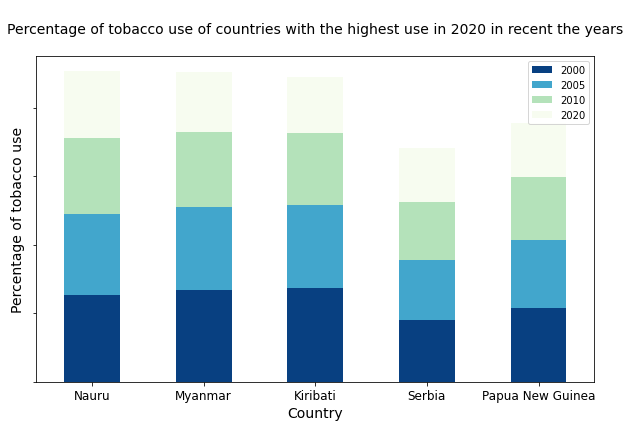

In [ ]:
#(Zahra)
# As evident in the previous plots, the goverment of the 5 countries with high tabacco use in-
# 2020 have been increasing their policy restriction from 2008 onwards.
# To analyse the effect of these restriction, the plot below depicts the percentage of-
# tabocco use in the past 7 years for these countries specificly.

# Creating a dataframe of percentage of tabocco use for only the countries with the highest tobacco use in 2020
highest_use_p = pd.merge(highest_use_df, tabacco_use, on=['Country Name','2020'], how= 'inner')
highest_use_p = highest_use_p.drop(['Country Code', 'diff'], axis=1).fillna(method='ffill')
highest_use_p = highest_use_p.reindex(columns = [col for col in highest_use_p.columns if col != '2020'] + ['2020'])
# Ploting the results
plt.figure(figsize=(15, 6))
color_list = ['darkslateblue', 'navy', 'royalblue', 'cornflowerblue', 'lightsteelblue', 'lavender']
# ax = highest_use_p.plot(x="Country Name", y=["2000", "2005", "2010", "2020"], kind="bar", rot=0, stacked=True, color=color_list)
ax = highest_use_p.plot(x="Country Name", y=["2000", "2005", "2010", "2020"], kind='bar', stacked=True, figsize=(10, 6), rot=0, fontsize=12, cmap='GnBu_r')
plt.gca().axes.yaxis.set_ticklabels([])
ax.set_title("\nPercentage of tobacco use of countries with the highest use in 2020 in recent the years\n", fontsize=14)
ax.set_xlabel('Country', fontsize=14)
ax.set_ylabel('Percentage of tobacco use', fontsize=14)
for c in ax.containers:
    # Showing the values on the stackes bar plots
    labels = [round(v.get_height(),1) for v in c]
    ax.bar_label(c, labels=labels, label_type='center')
plt.show()

<ipython-input-25-7429fd78e861>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_factors['taxes'] = cleaned_factors['taxes'].astype(float)


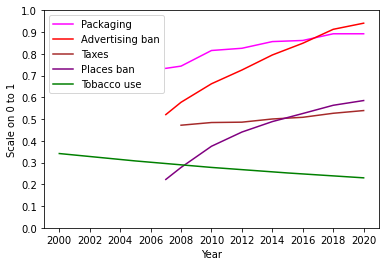

In [ ]:
#(Alexander) Plot to show worldwide development over time. adjusted all datasets to fit on a 0 to 1 scale.
#Still WIP, but functional
world = tabacco_use.loc[tabacco_use['Country Name'] == 'World']
world = world[["Country Name", "2000", "2005", "2010", "2015", "2020"]]
world = world.melt(id_vars=["Country Name"], var_name="Year", value_name="Tabacco Use").set_index('Year').drop(columns='Country Name')
world['Tabacco Use'] = world['Tabacco Use']/100
factors_df = factors.rename(columns={"Period": "Year"})

def partoftotal(x):
  amount = x.value_counts()[0]
  total = len(x.index)
  return amount/total

def xpartofone(x):
  amount = x.mean()
  return amount/2

def ypartofone(x):
  amount = x.mean()
  return amount/8

cleaned_factors = factors_df.dropna(subset = ['taxes'])
cleaned_factors['taxes'] = cleaned_factors['taxes'].astype(float)
taxes_df = (cleaned_factors.groupby('Year').agg({'taxes':'mean'})).squeeze()
packaging_df = factors_df.groupby('Year').agg({'packaging':partoftotal}).squeeze()
places_ban_df = factors_df.groupby('Year').agg({'smoking_ban_places':ypartofone}).squeeze()
advertising_ban_df = factors_df.groupby('Year').agg({'advertising_ban':xpartofone}).squeeze()
combined_df = pd.concat([taxes_df, packaging_df, places_ban_df, advertising_ban_df, world], axis=1)

plt.figure()
sns.lineplot(x="Year", y="packaging", data=combined_df, color="magenta")
sns.lineplot(x="Year", y="advertising_ban", data=combined_df, color="red")
sns.lineplot(x="Year", y="taxes", data=combined_df, color="brown")
sns.lineplot(x="Year", y="smoking_ban_places", data=combined_df, color="purple")
sns.lineplot(x="Year", y="Tabacco Use", data=combined_df, color="green")
plt.ylim(0, 1)
plt.ylabel('Scale on 0 to 1')
plt.xticks(years)
plt.yticks(tens)
plt.gca().legend(('Packaging', 'Advertising ban', 'Taxes', 'Places ban', 'Tobacco use'))

In [ ]:
# zoë: creating scatter plot with taxes and amount of smokers
#world = factors.loc[factors['Location'] == 'World']
#display(world)
#world = world[["Location", "2000", "2005", "2010", "2015", "2020"]]
#world = world.melt(id_vars=["Location"], var_name="Year", value_name="Tabacco Use").set_index('Year').drop(columns='Location')



In [ ]:
# MERGE COMPLETE TOBACCO USE AND FACTORS TABLE

# Note: Some work repeated from before but need the whole thing for stats, maybe we can rearrange things later

display(tabacco_use)
display(factors)



,Country Name,Country Code,2000,2005,2010,2015,2018,2019,2020,diff
1,Africa Eastern and Southern,AFE,21.206918,18.246597,15.853526,13.859451,12.479909,12.451456,12.125734,-9.081183
2,Afghanistan,AFG,36.900000,32.700000,29.100000,26.000000,23.800000,23.800000,23.300000,-13.600000
3,Africa Western and Central,AFW,12.780393,10.596512,8.775808,7.318057,6.347631,6.352941,6.120638,-6.659755
5,Albania,ALB,35.000000,31.300000,28.000000,25.100000,23.000000,23.000000,22.400000,-12.600000
6,Andorra,AND,35.900000,34.800000,34.000000,33.000000,32.000000,32.000000,31.800000,-4.100000
...,...,...,...,...,...,...,...,...,...,...
260,Samoa,WSM,39.000000,35.000000,31.400000,28.100000,25.900000,25.900000,25.300000,-13.700000
262,"Yemen, Rep.",YEM,27.300000,25.300000,23.400000,21.800000,20.500000,20.500000,20.300000,-7.000000
263,South Africa,ZAF,23.500000,22.500000,21.600000,21.000000,20.400000,20.400000,20.300000,-3.200000
264,Zambia,ZMB,19.900000,18.100000,16.700000,15.500000,14.600000,14.600000,14.400000,-5.500000


,SpatialDimValueCode,Location,Period,packaging,taxes,smoking_ban_places,advertising_ban
0,AND,Andorra,2020,No,0.78,5,0
1,AGO,Angola,2020,No,0.12,5,2
2,BIH,Bosnia and Herzegovina,2020,No,0.84,0,2
3,BWA,Botswana,2020,No,0.52,0,2
4,DMA,Dominica,2020,No,0.23,0,0
...,...,...,...,...,...,...,...
1555,VEN,Venezuela (Bolivarian Republic of),2007,Yes,NaN,2,0
1556,VNM,Viet Nam,2007,Yes,NaN,6,2
1557,YEM,Yemen,2007,Yes,NaN,0,2
1558,ZMB,Zambia,2007,Yes,NaN,3,0


In [ ]:
# MELT WHOLE TOBACCO TABLE

# melt (complete) tobacco use to fit structure of factors
tobacco = tabacco_use[["Country Name", "Country Code", "2000", "2005", "2010", "2015", "2020"]]
tobacco = tobacco.melt(id_vars=["Country Name", "Country Code"], var_name="Year", value_name="Tabacco Use")
display(tobacco)

,Country Name,Country Code,Year,Tabacco Use
0,Africa Eastern and Southern,AFE,2000,21.206918
1,Afghanistan,AFG,2000,36.900000
2,Africa Western and Central,AFW,2000,12.780393
3,Albania,ALB,2000,35.000000
4,Andorra,AND,2000,35.900000
...,...,...,...,...
1045,Samoa,WSM,2020,25.300000
1046,"Yemen, Rep.",YEM,2020,20.300000
1047,South Africa,ZAF,2020,20.300000
1048,Zambia,ZMB,2020,14.400000


In [ ]:
display(merged)

In [ ]:
# Will try out statistical test in smaller merged table but it would probably be better to do it on all data

#fill in NAs



In [ ]:
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 16.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.9/16.9 MB 46.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 59.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.6/96.6 KB 12.0 MB/s eta 0:00:00
  Attempting uninstall: click
    Found existing installation: click 7.1.2
    Uninstalling click-7.1.2:
      Successfully uninstalled click-7.1.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
flask 1.1.4 requires click<8.0,>=5.1, but you have click 8.1.3 which is incompatible.


In [ ]:
##(Alexander) Trying to make a worldmap with color showing tobacco use and with timescale.
import plotly.express as px
import geopandas as gpd

#Get dataset from geopandas containing info on map for world
path_to_data = gpd.datasets.get_path('naturalearth_lowres')
gdf = gpd.read_file(path_to_data)

#Reuse tabacco_use to merge with geopandas dataset
tabacco_geo = tabacco_use.rename(columns={'Country Code':'iso_a3'})
gdf_df = pd.merge(gdf, tabacco_geo, how='inner', on='iso_a3')
gdf_df_v2 = gdf_df.melt(id_vars=['pop_est','continent','name','iso_a3','gdp_md_est','geometry', 'Country Name', 'diff'], var_name= "Year", value_name="Tobacco Use")

ModuleNotFoundError: ignored

In [ ]:
#Use choropleth to plot dataset with a slider and playbutton.
fig = px.choropleth(gdf_df_v2, locations="iso_a3",
                    color="Tobacco Use",
                    hover_name="Country Name",
                    animation_frame="Year",
                    # Color scheme for plot (.Reds is the selected color here)
                    color_continuous_scale=px.colors.sequential.Reds,
                    # Set range for the color value, decrease 100 to get more extreme colors for some countries.
                    range_color = [0,100],
                    title = 'Worldwide tobacco use from 2000 until 2020',
                    width = 800,
                    height = 600)
# This value (720) seems to be the best way to control the speed of animation, higher is slower.
fig.layout.updatemenus[0].buttons[0].args[1]['frame']['duration'] = 720
fig.layout.updatemenus[0].buttons[0].args[1]['transition']['duration'] = 5
fig.show()

In [ ]:
#(Alexander) Also added a worldmap for packaging over time
packaging_geo = packaging.rename(columns={'SpatialDimValueCode':'iso_a3'})
gdf_packaging_df = pd.merge(gdf, packaging_geo, how='inner', on='iso_a3').sort_values(['Period'], ascending=1)


fig = px.choropleth(gdf_packaging_df, locations="iso_a3",
                    color="packaging", 
                    hover_name="Location",
                    animation_frame="Period",
                    # color_continuous_scale=px.colors.sequential.Greens,
                    # range_color = [0,100],
                    title = 'Worldwide packaging enforcement from 2007 until 2020',
                    width = 800,
                    height = 600)
fig.layout.updatemenus[0].buttons[0].args[1]['frame']['duration'] = 720
fig.layout.updatemenus[0].buttons[0].args[1]['transition']['duration'] = 5
fig.show()

In [ ]:
# Another one for the taxes
taxes_geo = taxes.rename(columns={'SpatialDimValueCode':'iso_a3'})
gdf_taxes_df = pd.merge(gdf, taxes_geo, how='inner', on='iso_a3').sort_values(['Period'], ascending=1)
gdf_taxes_df["taxes"] = gdf_taxes_df["taxes"].astype(float)

fig = px.choropleth(gdf_taxes_df, locations="iso_a3",
                    color="taxes", 
                    hover_name="Location",
                    animation_frame="Period",
                    color_continuous_scale=px.colors.sequential.Greens,
                    range_color = [0,1],
                    title = 'Worldwide taxes enforcement from 2008 until 2020',
                    width = 800,
                    height = 600)
fig.layout.updatemenus[0].buttons[0].args[1]['frame']['duration'] = 720
fig.layout.updatemenus[0].buttons[0].args[1]['transition']['duration'] = 5
fig.show()

In [ ]:
#Worldmap for smoking ban places
ban_places_geo = smoking_ban_places.rename(columns={'SpatialDimValueCode':'iso_a3'})
gdf_ban_places_df = pd.merge(gdf, ban_places_geo, how='inner', on='iso_a3').sort_values(['Period'], ascending=1)

fig = px.choropleth(gdf_ban_places_df, locations="iso_a3",
                    color="smoking_ban_places", 
                    hover_name="Location",
                    animation_frame="Period",
                    color_continuous_scale=px.colors.sequential.Blugrn,
                    range_color = [0,8],
                    title = 'Worldwide location ban from 2007 until 2020',
                    width = 800,
                    height = 600)
fig.layout.updatemenus[0].buttons[0].args[1]['frame']['duration'] = 720
fig.layout.updatemenus[0].buttons[0].args[1]['transition']['duration'] = 5
fig.show()

In [ ]:
#Worldmap for advertising ban places
advertising_ban_geo = advertising_ban.rename(columns={'SpatialDimValueCode':'iso_a3'})
gdf_advertising_ban_df = pd.merge(gdf, advertising_ban_geo.dropna(), how='inner', on='iso_a3').sort_values(['Period'], ascending=1)

fig = px.choropleth(gdf_advertising_ban_df, locations="iso_a3",
                    color="advertising_ban", 
                    hover_name="Location",
                    animation_frame="Period",
                    color_continuous_scale=px.colors.sequential.Mint,
                    range_color = [0,3],
                    title = 'Worldwide advertising ban from 2007 until 2020',
                    width = 800,
                    height = 600)
fig.layout.updatemenus[0].buttons[0].args[1]['frame']['duration'] = 720
fig.layout.updatemenus[0].buttons[0].args[1]['transition']['duration'] = 5
fig.show()

In [ ]:
#For the combined_df, change the tobacco use value from 0-1 to 0-100 range
combined_df['Tabacco Use'] = combined_df['Tabacco Use'].apply(lambda x: x*100)

In [ ]:
#Plot tobacco use trend worldwide
plt.figure()
sns.lineplot(x="Year", y="Tabacco Use", data=combined_df, color="red")
plt.ylim(0, 100)
plt.ylabel('Percentage of population')
plt.xticks(years)
plt.yticks(range(0,101, 10))
plt.title('Tobacco users worldwide 2000-2020')
plt.figure(facecolor='yellow')

NameError: ignored